In [1]:
from shutil import copyfile
# copying the test database (this is just for repeated testing)
src = 'C:/Users/Owen/Documents/Academic/CNERG/cycsat/simulations/four_reactors.sqlite'
dst = 'C:/Users/Owen/Documents/Academic/CNERG/cycsat/reactor_test_sample.sqlite'
copyfile(src, dst)

'C:/Users/Owen/Documents/Academic/CNERG/cycsat/reactor_test_sample.sqlite'

## open cyclus results

In [2]:
from cycsat.simulation import Simulator
from matplotlib import pyplot as plt
%matplotlib inline

# this loads a cyclus simulation
sim = Simulator('reactor_test_sample.sqlite')

## build sites

In [3]:
from cycsat.prototypes.ByronIL import ByronIL

temps = {'Reactor1': ByronIL,
         'Reactor2': ByronIL}

sim.build(name='first build',templates=temps)
sim.build(name='second build',templates=temps)
sim.build(name='third build',templates=temps)

sim.Site()

2 containment placement failed after { 100 } attempts.


,id,AgentId,name,maxx,maxy,defined,prototype,template,ax_angle,build_id,obj
0,1,19,"Byron, IL",7000,7000,True,Reactor1,ByronIL,78.01,1,<cycsat.prototypes.ByronIL.ByronIL object at 0...
1,2,20,"Byron, IL",7000,7000,True,Reactor2,ByronIL,-44.99,1,<cycsat.prototypes.ByronIL.ByronIL object at 0...
2,3,19,"Byron, IL",7000,7000,True,Reactor1,ByronIL,-175.99,2,<cycsat.prototypes.ByronIL.ByronIL object at 0...
3,4,20,"Byron, IL",7000,7000,True,Reactor2,ByronIL,-55.99,2,<cycsat.prototypes.ByronIL.ByronIL object at 0...
4,5,19,"Byron, IL",7000,7000,True,Reactor1,ByronIL,149.01,3,<cycsat.prototypes.ByronIL.ByronIL object at 0...
5,6,20,"Byron, IL",7000,7000,True,Reactor2,ByronIL,171.01,3,<cycsat.prototypes.ByronIL.ByronIL object at 0...


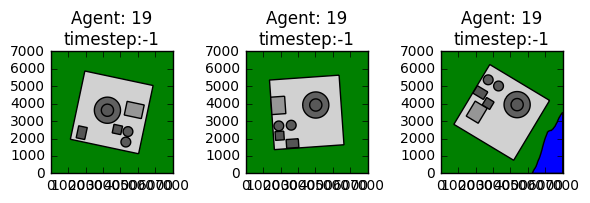

In [4]:
# plot builds of facilities
sim.plot('AgentId == 19')
plt.tight_layout()

(<matplotlib.figure.Figure at 0x1d127c7a828>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d127c66080>)

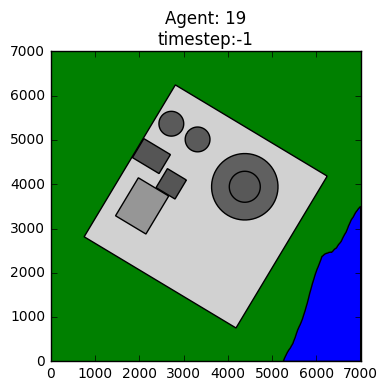

In [9]:
# plot mulitple facilities with a sql query
sim.plot(sql='id == 5')

## run the simulation, plot and export gifs

In [6]:
sim.simulate(sql='AgentId == 19')

simulating 1 19
simulating 3 19
simulating 5 19


(<matplotlib.figure.Figure at 0x1d1269f3128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d1268939b0>)

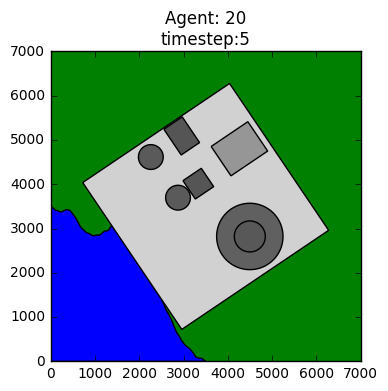

In [7]:
# plot at a timestep
sim.plot('id == 4',timestep=5)

In [10]:
sim.gif('AgentId==19',np.arange(40),'example')

![alt text](example.gif "Title Text 1")